<a href="https://colab.research.google.com/github/kouseizack/NLP/blob/master/nlp_multilabel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd /content/drive/My Drive/nlp_basics

/content/drive/My Drive/nlp_basics


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import nltk #NLTK(Natural Language Toolkit)
from nltk.corpus import stopwords #NLTK(Natural Language Toolkit) in python has a list of stopwords stored in 16 different languages.
from nltk.tokenize import word_tokenize# To tokenize words
import re
import seaborn as sns
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
import matplotlib.pyplot as plt # data visualization
%matplotlib inline

In [ ]:
data_train = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')
print (data_train.shape)
print (data_test.shape)
data_train.head(10)

(159571, 8)
(153164, 2)


,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0


Data Visulalization

In [ ]:
categories = list(data_train.columns.values)
categories = categories[2:]
print (categories)

['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']


In [ ]:
count_per_category = [sum(data_train[y]) for y in data_train.columns.values[2:]]
count_per_category

[15294, 1595, 8449, 478, 7877, 1405]

Text(0, 0.5, 'Occurrence')

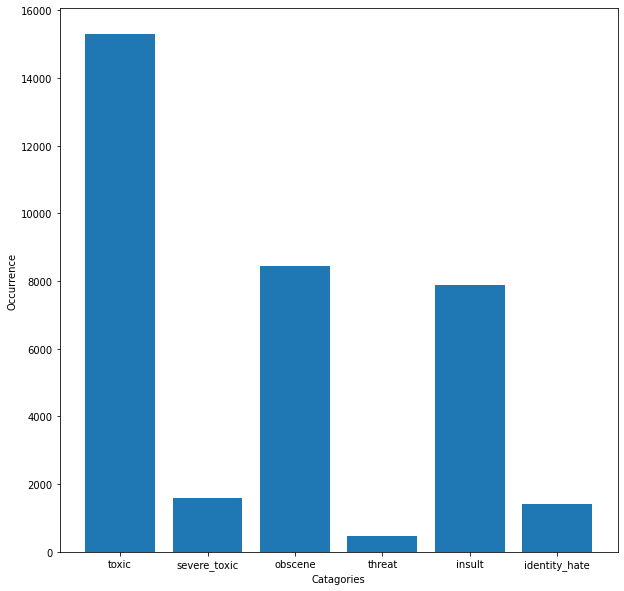

In [ ]:
plt.figure(figsize = (10, 10))
plt.bar(np.arange(len(count_per_category)),count_per_category)
plt.xticks(np.arange(len(count_per_category)), categories)
plt.xlabel('Catagories')
plt.ylabel('Occurrence')

In [ ]:
train_sample = data_train.loc[np.random.choice(data_train.index, size=85000)]
train_sample.shape
test_sample = data_test.loc[np.random.choice(data_test.index, size=70000)]
test_sample.shape

(70000, 2)

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import copy
tokenizer = Tokenizer(num_words=50000)

print (train_sample.shape)

total_comments = train_sample['comment_text'].values.tolist() + test_sample['comment_text'].values.tolist()
tokenizer.fit_on_texts(total_comments)
X_train , X_test , Y_train , Y_test = train_test_split(train_sample['comment_text'].values , train_sample.iloc[: , 2:] ,random_state=42, test_size=0.30, shuffle=True)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)
maxlen = max([len(s.split()) for s in total_comments])

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

word_index = tokenizer.word_index
print ("length of word_index :" , len(word_index))
p = 0
for key , val in word_index.items():
  if(p <= 2):
    print (key , val)
  p += 1

print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(85000, 8)
length of word_index : 208750
the 1
to 2
of 3
(59500, 1990) (59500, 6)
(25500, 1990) (25500, 6)


Data pre-processsing : 


In [ ]:
def cleanHtml(sentence):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', str(sentence))
    return cleantext

def cleanPunc(sentence): #function to clean the word of any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    cleaned = cleaned.strip()
    cleaned = cleaned.replace("\n"," ")
    return cleaned

def keep_alpha_numer(sentence):
    alpha_sent = ""
    for word in sentence.split():
        alpha_word = re.sub("[^a-zA-Z0-9]"," ", word)
        alpha_sent += alpha_word
        alpha_sent += " "
    alpha_sent = alpha_sent.strip()
    return alpha_sent

In [ ]:
train_sample['comment_text'] = train_sample['comment_text'].str.lower()
test_sample['comment_text'] = test_sample['comment_text'].str.lower()

train_sample['comment_text'] = train_sample['comment_text'].apply(cleanHtml)
train_sample['comment_text'] = train_sample['comment_text'].apply(cleanPunc)
train_sample['comment_text'] = train_sample['comment_text'].apply(keep_alpha_numer)
print (train_sample.head())
print (train_sample['comment_text'])

                      id  ... identity_hate
93589   fa3e98bf6dfcadb1  ...             0
78212   d159a322493c8f81  ...             0
158265  eb32288317b01e8e  ...             0
33679   59d052fa96d1a94a  ...             0
120345  839c70dce415208b  ...             0

[5 rows x 8 columns]
93589     informal proof   energy dependence since the d...
78212     mm well sure ill give it a whirl what the heck...
158265                 searching i was able to find a video
33679     eleventh doctor   series 1 series 5 series 31 ...
120345    i would also like to point out that as the vic...
                                ...                        
141724    i think we should list it as inactive encyclop...
42932     this is not patent nonsense i am not taking of...
82831                                    ill stop okay talk
36404     edit  he is now monitoring this entry on my ta...
123964    hi and welcome to wilipedia trivia is a contro...
Name: comment_text, Length: 85000, dtype: object


In [ ]:
test_sample['comment_text'] = test_sample['comment_text'].apply(cleanHtml)
test_sample['comment_text'] = test_sample['comment_text'].apply(cleanPunc)
test_sample['comment_text'] = test_sample['comment_text'].apply(keep_alpha_numer)
test_sample.head()

,id,comment_text
14983,1924559973053cb9,irene marsha silverblatt is a eurocentrist
137480,e5d27b2b3d383412,justin wilson is one of the most popular drive...
25021,29b42940997e611f,sounds like a job for a bot i did a search for...
132336,dd22a0a2be693651,titboobs tiiiiiiiiitboooooooooooooooobs dic...
22027,24c3d5dff46db72e,more badass than you already are


In [ ]:
tokenizer = RegexpTokenizer(r'\w+')
nltk.download('stopwords')
stop_words=set(stopwords.words('english'))
def remove_stopwords(text):
    words= [w for w in text if w not in stopwords.words('english')]
    return words

train_sample['comment_text'] = [tokenizer.tokenize(sentences) for sentences in train_sample['comment_text']]
#train_sample['comment_text'] = train_sample['comment_text'].apply(lambda x : remove_stopwords(x))

test_sample['comment_text'] = [tokenizer.tokenize(sentences) for sentences in test_sample['comment_text']]
#test_sample['comment_text'] = test_sample['comment_text'].apply(lambda x : remove_stopwords(x))
print (train_sample["comment_text"])
print (test_sample["comment_text"])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
93589     [informal, proof, energy, dependence, since, t...
78212     [mm, well, sure, ill, give, it, a, whirl, what...
158265        [searching, i, was, able, to, find, a, video]
33679     [eleventh, doctor, series, 1, series, 5, serie...
120345    [i, would, also, like, to, point, out, that, a...
                                ...                        
141724    [i, think, we, should, list, it, as, inactive,...
42932     [this, is, not, patent, nonsense, i, am, not, ...
82831                               [ill, stop, okay, talk]
36404     [edit, he, is, now, monitoring, this, entry, o...
123964    [hi, and, welcome, to, wilipedia, trivia, is, ...
Name: comment_text, Length: 85000, dtype: object
14983     [irene, marsha, silverblatt, is, a, eurocentrist]
137480    [justin, wilson, is, one, of, the, most, popul...
25021     [sounds, like, a, job, for, a, bot, i, did

Lemmatizing the corpus


In [ ]:
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
def word_lemmatizer(text):
    lem_text= [lemmatizer.lemmatize(i) for i in text]
    return lem_text 
train_sample['comment_text'] = train_sample['comment_text'].apply(lambda x : word_lemmatizer(x))
test_sample['comment_text'] = test_sample['comment_text'].apply(lambda x : word_lemmatizer(x))
print (train_sample['comment_text'])

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
93589     [informal, proof, energy, dependence, since, t...
78212     [mm, well, sure, ill, give, it, a, whirl, what...
158265         [searching, i, wa, able, to, find, a, video]
33679     [eleventh, doctor, series, 1, series, 5, serie...
120345    [i, would, also, like, to, point, out, that, a...
                                ...                        
141724    [i, think, we, should, list, it, a, inactive, ...
42932     [this, is, not, patent, nonsense, i, am, not, ...
82831                               [ill, stop, okay, talk]
36404     [edit, he, is, now, monitoring, this, entry, o...
123964    [hi, and, welcome, to, wilipedia, trivia, is, ...
Name: comment_text, Length: 85000, dtype: object


In [ ]:
import copy
train_sentences = train_sample['comment_text'].values.tolist()
test_sentences = test_sample['comment_text'].values.tolist()
total_sentences = copy.deepcopy(train_sentences)
total_sentences.extend(test_sentences)
print (train_sentences[0])

['informal', 'proof', 'energy', 'dependence', 'since', 'the', 'distribution', 'of', 'motion', 'doe', 'not', 'depend', 'on', 'the', 'energy', 'shouldnt', 'this', 'instead', 'read', 'since', 'the', 'distribution', 'of', 'motion', 'depends', 'on', 'the', 'energy', 'which', 'is', 'in', 'turn', 'independent', 'of', 'the', 'field']


In [ ]:
from gensim.models import Word2Vec
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
w2v = Word2Vec(total_sentences, size=100, window=5, min_count=1, workers=4)
w2v.train(total_sentences,total_examples=len(total_sentences),epochs=10)
w1  = "edit"
print (w2v.wv.most_similar (positive=w1))

[('edits', 0.6396616697311401), ('paine1776', 0.6392613649368286), ('revert', 0.625147819519043), ('williamite', 0.6056432723999023), ('incidentsthomas', 0.582499623298645), ('seunas', 0.5777773261070251), ('srar', 0.5622091293334961), ('reversion', 0.5489820241928101), ('estebans', 0.5458500981330872), ('95860578', 0.5455988049507141)]


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [ ]:
import tensorflow.compat.v1 as tf
from keras.utils import to_categorical
tf.disable_v2_behavior()
nb_words = len(word_index) + 1
embed_size = 100

In [ ]:
embedding_matrix = np.zeros((nb_words, embed_size))
for word, i in word_index.items():
    if i >= nb_words : continue
    if word in w2v.wv.vocab:
      embedding_vector = w2v.wv[word]
      embedding_matrix[i] = embedding_vector


vocab_size = len(embedding_matrix)
print (vocab_size)
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Embedding(input_dim=vocab_size, 
                           output_dim = 100,weights=[embedding_matrix] , 
                           input_length = maxlen, trainable=False))
model.add(tf.keras.layers.LSTM(units = 60 ,dropout = 0.2 , recurrent_dropout = 0.2))
model.add(tf.keras.layers.Dense(6 , activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

208751
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 1990, 100)         20875100  
_________________________________________________________________
lstm_2 (LSTM)                (None, 60)                38640     
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 366       
Total params: 20,914,106
Trainable params: 39,006
Non-trainable params: 20,875,100
_________________________________________________________________


In [ ]:
model.fit(X_train, Y_train, batch_size = 64 , epochs=2, verbose=2 , validation_split=0.2)
# evaluate
loss, acc = model.evaluate(X_test, Y_test, verbose=1)
print('Test Accuracy: %f' % (acc*100))

Train on 47600 samples, validate on 11900 samples
Epoch 1/2
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


47600/47600 - 2179s - loss: 0.1610 - acc: 0.9611 - val_loss: 0.1428 - val_acc: 0.9630
Epoch 2/2
47600/47600 - 2181s - loss: 0.1450 - acc: 0.9620 - val_loss: 0.1425 - val_acc: 0.9630
Test Accuracy: 96.294814


In [ ]:
print (model.outputs)
model.save("network.h5")


[<tf.Tensor 'dense_2/Sigmoid:0' shape=(?, 6) dtype=float32>]
